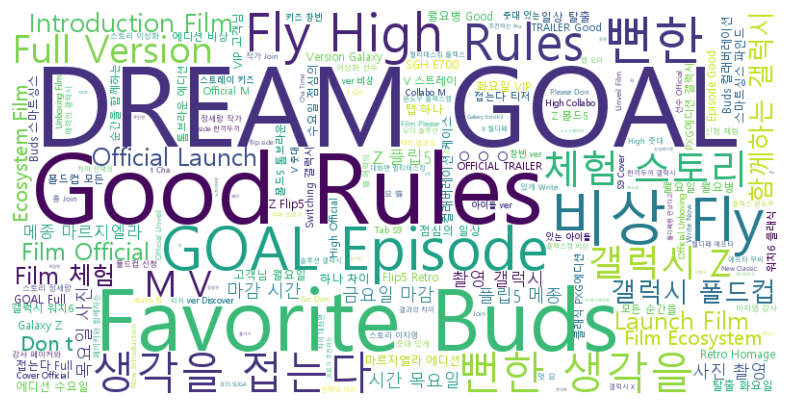

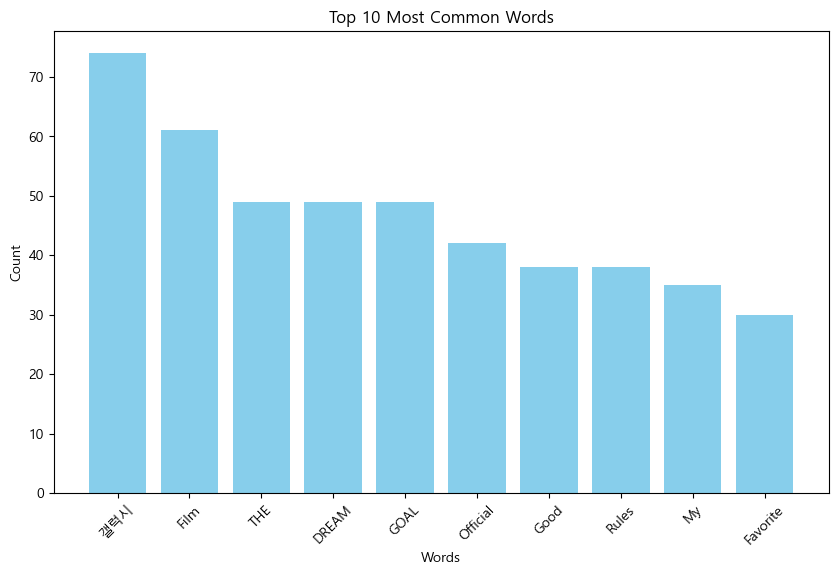

       word  count
0       갤럭시     74
1      Film     61
2       THE     49
3     DREAM     49
4      GOAL     49
5  Official     42
6      Good     38
7     Rules     38
8        My     35
9  Favorite     30


In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from matplotlib import font_manager, rc
import re

s_title = pd.read_csv('./삼성전자 갤럭시 광고 정보들.csv')
s_title['title'] = s_title['title'].str.extract(r'\](.*?)\|')
reviews = s_title['title'].dropna()
reviews = s_title['title'].dropna()
text = ' '.join(reviews)

# NLTK를 사용하여 토큰화
tokens = word_tokenize(text)

# 불용어리스트 지정
stop_words = set(['가','게','고','과','네','는','다','도','들','듯','를','에','와','으로',
'은','을','의','이','인','임','자','잘','좀','지','하다','한', '.', ',', '?', '!', '(', ')','...','..'
,'이번','수','같은','그냥','같','있','-','–','편'])

# 불용어 제거
tokens = [word for word in tokens if word.lower() not in stop_words]

# 워드클라우드 생성 및 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고자 하는 한글 폰트의 경로를 지정
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(tokens))

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 단어 빈도수 분석 및 한글 폰트 설정
word_counter = Counter(tokens)
most_common_words = word_counter.most_common(10)

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df_word_count = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(10, 6))
plt.bar(df_word_count['word'], df_word_count['count'], color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(df_word_count)